## Simple Linear Regression 

In this linear regression model we will be predicting the percentage of the marks of any student on the basis on number of study hours of the student.

In [1]:
#We will import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#We will the dataset through a url
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url)

In [3]:
#Now we will have a look at the dataset
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In this dataset there are only two variables one is Hours which is showing the number of hours a student studying and other is score which shows the score the student gets.

In [4]:
#We will now check the data types and number of elements in the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Hours is in float datatype while the Scores is in int datatype

In [5]:
#WE will check the summary of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


On average the number of hours studied was 5.01 hour and average score was 51.48 percentage.


We can see as the number of hours are increasing the scores is also increasing.

## Visualizing the data

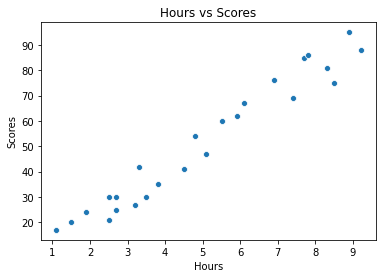

In [6]:
#Now we will check what kind of relations is present in between oue variables - For that we will use a scatter plot
sns.scatterplot(x="Hours",y="Scores",data=data)
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

We can clearly see that the hours of study and percentage scored by the student shows a positive linear relation.

## Preparing the Data

In [7]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [8]:
#We will now use the library to split the data into train and test
from sklearn.model_selection import train_test_split

In [9]:
#We will now split the data into 4 sections X_train, X_test, y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
#We will use 80% of the data for the training purpose and rest of the data for testing our model

## Training the Algorithm

In [10]:
#We will first import the library for linear regression
from sklearn.linear_model import LinearRegression

In [11]:
#We will now save the object
model = LinearRegression()

In [12]:
#Now we will fit the model 
model.fit(X_train, y_train)

LinearRegression()

Now we have fitted the model into our training datset 

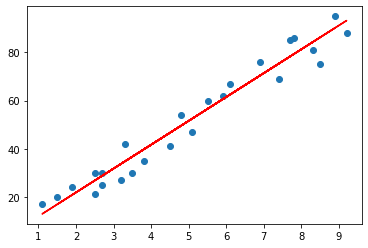

In [13]:
#We wil now plot the regression line

reg_line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, reg_line,'r');
plt.show()

## Using Test dataset

In [14]:
#We will now predict the values and check the error
pred = model.predict(X_test) #Predicting the values 
error = pred-y_test #Finding error

In [15]:
#We will now save the actual test dataset, predicted value and error into a dataframe
tested_data = pd.DataFrame({'Actual':y_test,'Predicted':pred,'Error':error})
tested_data

,Actual,Predicted,Error
0,20,16.884145,-3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,-3.205199
4,62,60.491033,-1.508967


In [16]:
#We will import the library for mean absolute error amd mean squared error
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
#We will now find the mean absolute error and mean squared error for evaluting our model
print("Mean absolute error is: {}".format(mean_absolute_error(y_test,pred)))
print("Mean square error is : {}".format(mean_squared_error(y_test,pred)))

Mean absolute error is: 4.183859899002975
Mean square error is : 21.5987693072174


In [18]:
## Now we will find the answer of question: 
#What will be percentage of the student if he/she studies for 9.25 hrs/day
hours = 9.25
prediction = model.predict([[hours]]) #We are using double bracket as model expect 2-d array and we are passing 1-D
print("Study Hour: {}".format(hours))
print("Percentage predicted by the model: {}".format(prediction[0]))

Study Hour: 9.25
Percentage predicted by the model: 93.69173248737538
